# Question 1: Explain the follwing concepts:
    
**1.Supervised Learning**

>Supervised learning is an algorithm in machine learning that uses labeled training data to make predictions. This algorithm learns from the given desired solutions by generalizing the patterns between the input features and corresponding labels. From this, the algorithm can then make predictions on unseen data. 

**2.Unsupervised Learning**

>Unsupervised learning is an algorithm that learns from unlabeled data without a given input and output pair. Instead, the algorithm looks at the patterns in data to find meaningful representations. This type of learning is useful when obtaining labeled data is difficult. Good for looking for clusters, anomalies, or find new representations of data.

**3.Online Learning**

>Online learning means a system can be trained incrementally with sequential data or in mini-batches of data. It useful in cases where the data is continuous or constantly streaming into the system. The learning model is constantly updating as new data becomes available, allowing it to improve the predictions over time. 

**4.Batch Learning**

>Batch learning is also known as offline learning. It utilizes a fixed dataset that trains on all available data. It uses a complete dataset to optimize parameters and predictions. If new data is introduced, it must re-train from scratch on the entire dataset again.

**5.Model-based Learning**

>Model-based learning is when a model is created using the training examples. The model is then used to make predictions for new examples. It focuses on the patterns, structures, and dependencies in the data to generate new instances that resemble the original data. It usually is used as a statistical model that is used to make new examples. 

**6.Instance-based Learning**

>Instance-based learning is when the system looks at new examples and compares with existing examples to make predictions. So in this case, the training data is used as the model and the new data becomes classified by how similar it is to the instances in the training set. It looks for the most relevant instances in training data to understand and predict new instances.



# Question 2: Write a program to estimate the parameters for an unknown polynomial using the polyfit() function of the numpy package

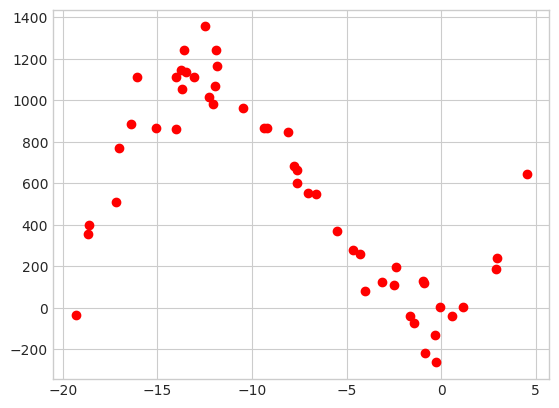

In [2]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn-whitegrid') 
import numpy as np
noise_scale = 100
number_of_samples = 50
x = 25*(np.random.rand(number_of_samples, 1) - 0.8)
y = 5 * x + 20 * x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples, 1) 
plt.plot(x,y,'ro')

**Plot the noisy data and the polynomial you found in the same figure. You can use any value of m from 2, 3, 4, 5, 6, where m is the degree of the polynomial.**

In [17]:
X_train = x[:int(0.8*number_of_samples)]
X_test = x[int(0.8*number_of_samples)]

In [18]:
y_train = y[:int(0.8*number_of_samples)]
y_test = y[int(0.8*number_of_samples)]

print(len(x),len(X_train),len(X_test))
print(len(y), len(y_train),len(y_test))

50 40 1
50 40 1


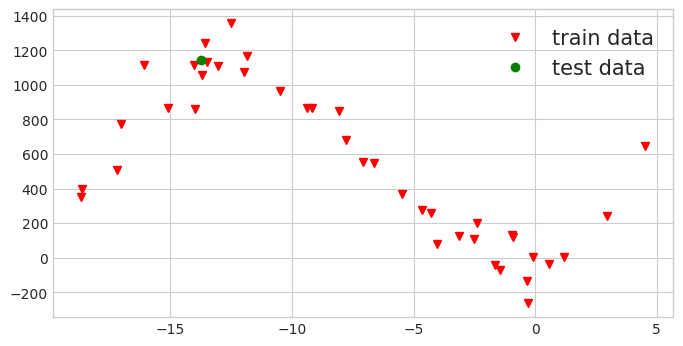

In [26]:
plt.rcParams['figure.figsize'] = (8.0, 4.0)
plt.plot(X_train,y_train, 'rv',label='train data')
plt.plot(X_test,y_test,'go',label='test data')
plt.legend(loc='best', fontsize=15)
plt.show()

In [27]:
plt.rcParams['figure.figsize'] = (10.0, 10.0)
import matplotlib.colors as mcolors
colors = list(mcolors.TABLEAU_COLORS.keys())

In [28]:
res={}
fittingFunction={}
for i in [2,3,4,5,6]:
    tmp = np.polyfit(X_train.flatten(), y_train.flatten(),i)
    fittingFunction[i]=np.poly1d(tmp)
    print(fittingFunction[i])
    
    res[i]=fittingFunction[i](X_train.flatten())

       2
-2.44 x - 87.96 x + 113.9
       3         2
1.097 x + 22.21 x + 14.44 x - 25.15
        4        3         2
0.0111 x + 1.42 x + 24.35 x + 11.59 x - 43.58
            5           4         3         2
-0.0007753 x - 0.01672 x + 1.145 x + 24.16 x + 16.84 x - 38.37
           6           5          4         3         2
0.0003353 x + 0.01378 x + 0.1832 x + 1.844 x + 20.65 x - 0.03888 x - 39.37


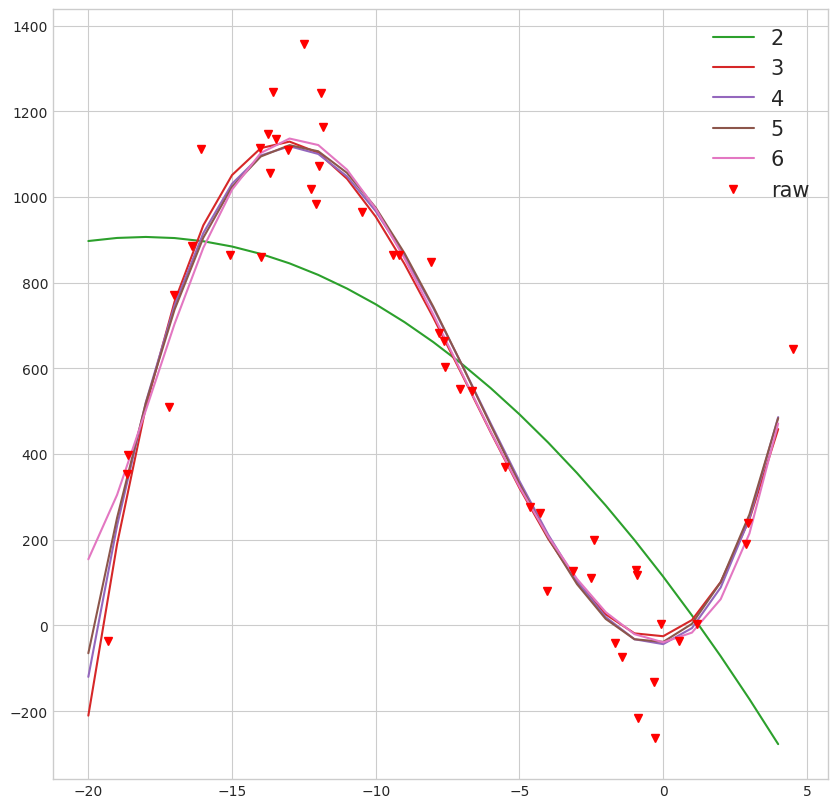

In [29]:
ref_x=[i for i in range(-20,5)]

for i in range(2,7):
    plt.plot(ref_x,fittingFunction[i](ref_x),color=mcolors.TABLEAU_COLORS[colors[i]],label=str(i))
    
plt.plot(x,y,'rv', label='raw')
plt.legend(loc='best', fontsize=15)
plt.show()

**Plot MSE versus m, for m = 1, 2, 3, 4, 5, 6, 7, 8 respectively. Identify the best choice of m and explain why**

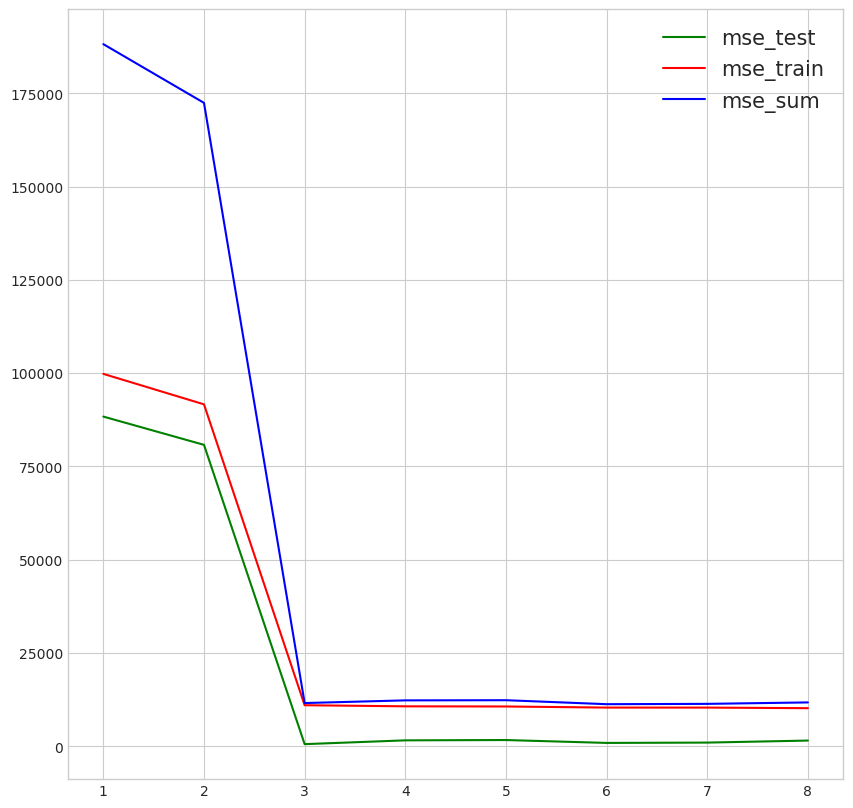

In [39]:
res = {}
fittingFunction={}
degrees = [1,2,3,4,5,6,7,8]

for degree in degrees:
    params = np.polyfit(X_train.flatten(), y_train.flatten(), degree)
    fittingFunction[degree]=np.poly1d(params)
    
    res[i]=fittingFunction[degree](X_train.flatten())

mse_train=[((y_train-fittingFunction[degree](X_train))**2).mean() for degree in degrees]
mse_test=[((y_test-fittingFunction[degree](X_test))**2).mean() for degree in degrees]
mse_sum=[degree+j for degree, j in zip(mse_train,mse_test)]

plt.plot(degrees, mse_test, 'g',label='mse_test') 
plt.plot(degrees, mse_train, 'r',label='mse_train') 
plt.plot(degrees, mse_sum, 'b',label='mse_sum') 
plt.legend(loc='best', fontsize=15)



>We see that they converge on m=3 and therefore m=3 is the best choice

**Change variable noise_scale to 150, 200, 400, 600, 1000 respectively, re-run the algorithm and plot the polynomials with the m found in 2). Discuss the impact of the noise scale on the accuracy of the returned parameters. [You need to plot a figure as in 1) for each choice of noise_scale.]**

In [44]:
noise_scales = [150, 200, 400, 600, 1000]
x={}
y={}
fit_func={}

for noise in noise_scales:
    x[noise] = 25*(np.random.rand(number_of_samples, 1) - 0.8)
    y[noise]= 5* x[noise] + 20 * x[noise]**2 + 1 * x[noise]**3 + noise_scale*np.random.randn(number_of_samples, 1)
    params = np.polyfit(x[noise].flatten(),y[noise].flatten(),3)
    fit_func[noise]=np.poly1d(params)



In [45]:
for i in noise_scales:
    print(fit_func[i])

       3         2
1.007 x + 20.05 x + 3.391 x + 1.968
        3         2
0.9127 x + 17.89 x - 5.538 x + 39.58
        3         2
0.9965 x + 19.91 x + 5.818 x + 23.9
        3         2
0.9293 x + 18.26 x - 1.714 x + 34.92
       3         2
1.082 x + 21.77 x + 8.941 x - 46.47


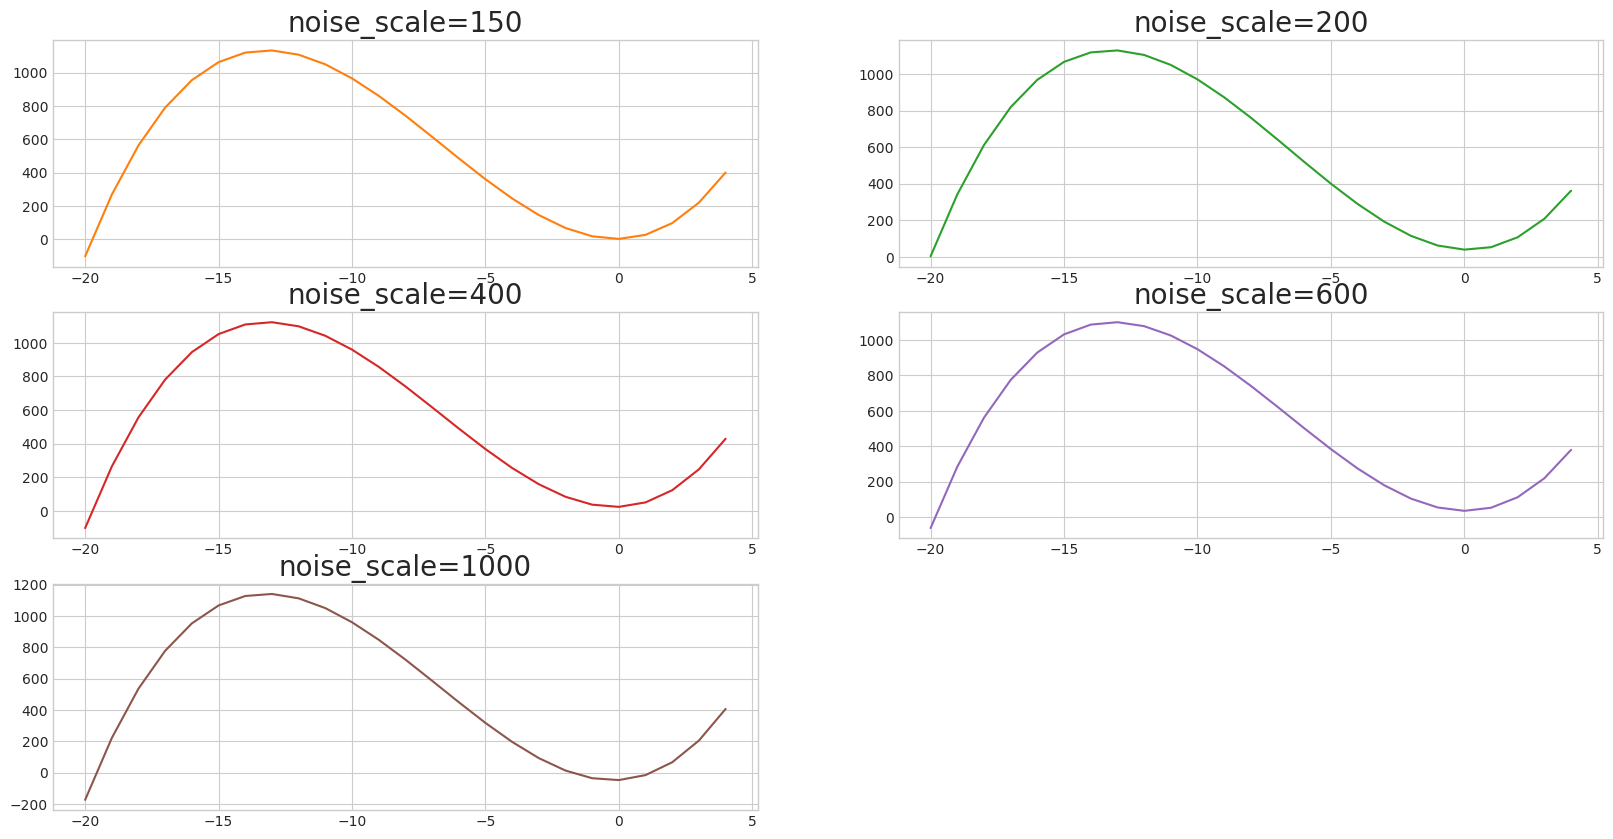

In [69]:
fig = plt.figure()
a=1
for i in noise_scales:
    plt.subplot(3,2,a).set_title('noise_scale={}' .format(i),fontdict={'weight':'normal','size': 20})
    plt.plot(ref_x,fit_func[i](ref_x),color=mcolors.TABLEAU_COLORS[colors[a]])
    plt.rcParams['figure.figsize'] = (20.0, 10.0)
    a+=1

plt.show()
                                 

In [83]:
equations={}
for scale in noise_scales:
    tmp_label=r'$y = '
    for i in range(len(fit_func[scale].c)):
        if i!=0: tmp_label+='+'
        tmp_label+='('+str(round(fit_func[scale].c[i],3))+'*x^'+str(3-i)+')'
    equations[scale]=tmp_label+'$'

In [84]:
equations

{150: '$y = (1.007*x^3)+(20.052*x^2)+(3.391*x^1)+(1.968*x^0)$',
 200: '$y = (0.913*x^3)+(17.887*x^2)+(-5.538*x^1)+(39.578*x^0)$',
 400: '$y = (0.997*x^3)+(19.906*x^2)+(5.818*x^1)+(23.904*x^0)$',
 600: '$y = (0.929*x^3)+(18.256*x^2)+(-1.714*x^1)+(34.919*x^0)$',
 1000: '$y = (1.082*x^3)+(21.775*x^2)+(8.941*x^1)+(-46.467*x^0)$'}

>We see that the parameters become more inaccurate as the noise scales get bigger.

**Change variable number_of_samples to 40, 30, 20, 10 respectively, re-ran the algorithm and plot the polynomials with the m found in 2). Discuss the impact of the number of samples on the accuracy of the returned parameters. [You need to plot a figure as in 1) for each choice of number_of_samples.]**


In [87]:
samples_list=[40,30,20,10]

samples_x={}
samples_y={}
samples_fit_func={}

for number in samples_list:
    samples_x[number] = 25*(np.random.rand(number, 1) - 0.8)
    samples_y[number] = 7 * samples_x[number] + 15 * samples_x[number]**2 + 1 * samples_x[number]**3 + 100*np.random.randn(number, 1)
    param = np.polyfit(samples_x[number].flatten(),samples_y[number].flatten(),3)
    samples_fit_func[number]=np.poly1d(param)

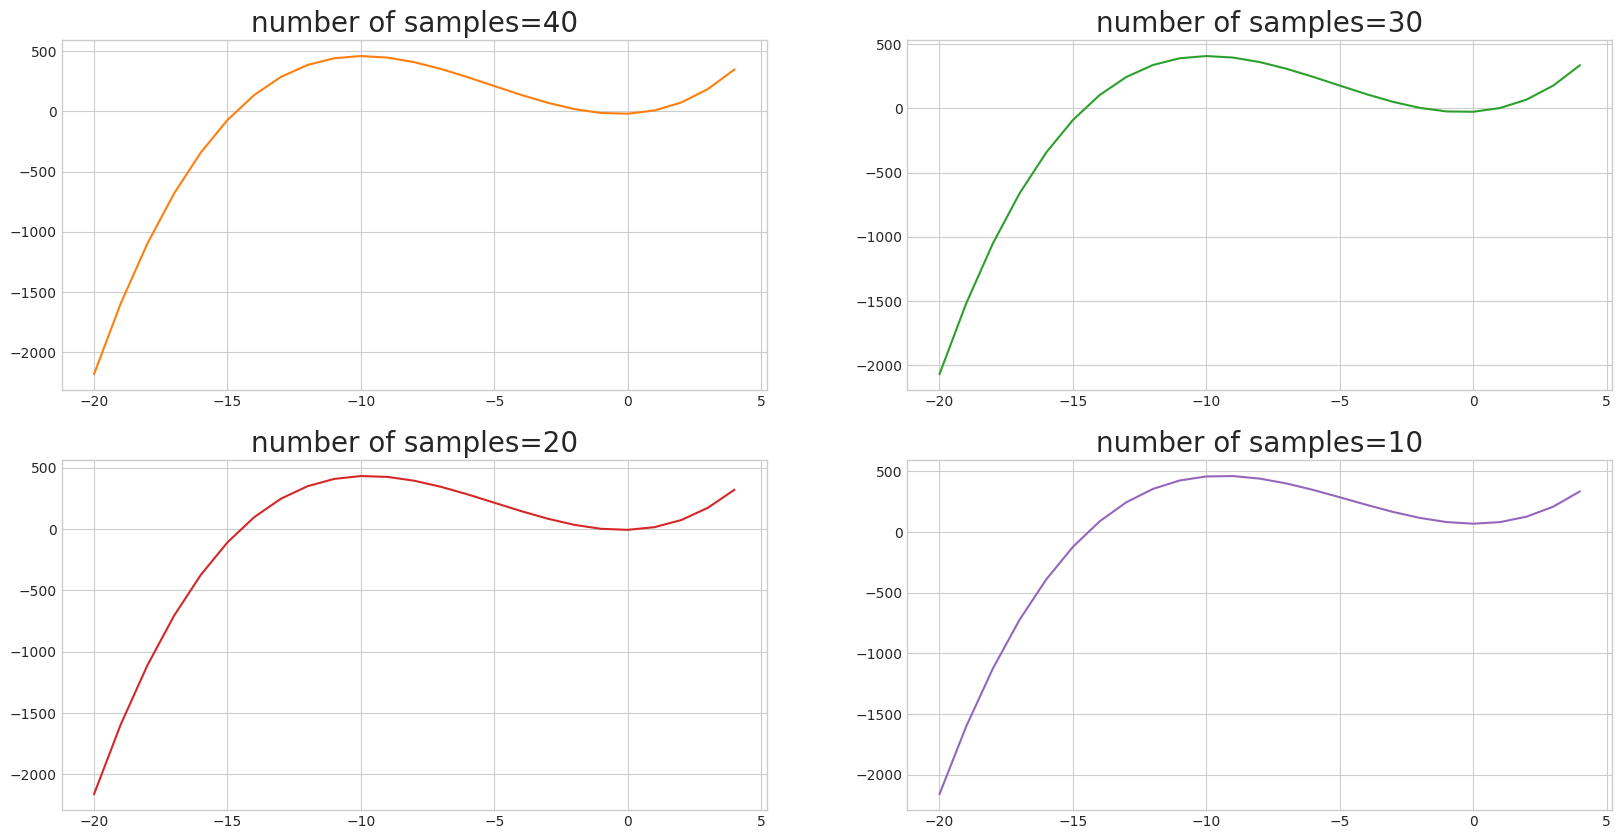

In [90]:
fig = plt.figure()
a=1
for i in samples_list:
    plt.subplot(2,2,a).set_title('number of samples={}' .format(i),fontdict={'weight':'normal','size': 20})
    plt.plot(ref_x,samples_fit_func[i](ref_x),color=mcolors.TABLEAU_COLORS[colors[a]])
    plt.rcParams['figure.figsize'] = (20.0, 10.0)
    a+=1

plt.show()

>as the number of samples become smaller, the more inaccurate the parameters become